<a href="https://colab.research.google.com/github/jraj-157/Machine_Learning/blob/main/MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


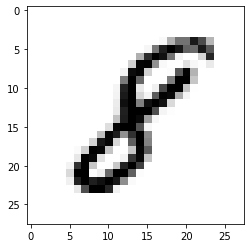

In [17]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [18]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [19]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [20]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2101 - accuracy: 0.9373
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0848 - accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0601 - accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0467 - accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0372 - accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0295 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0254 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0238 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0191 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 37s 20m

9


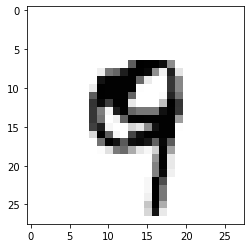

In [21]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0669 - accuracy: 0.9844


[0.0669262707233429, 0.9843999743461609]